In [8]:
# Approach to generate the linear trajectory to every trajectory recived from fiji to then compre
# them by some metrics:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Creating the sample data frame randomly generated
df_random = pd.DataFrame(columns=['Track_name','start_x', 'start_y', 'end_x', 'end_y', 'Move_frames'])

In [3]:
# Generating 10 random positions for start and end points:
track_names = [f'track_{i}' for i in range(1,21)]
df_random['Track_name'] = track_names
df_random['Move_frames'] = random.sample(range(5,100), 20)

col_list = ['start_x', 'start_y', 'end_x', 'end_y']
for col in col_list:
    df_random[col] = random.sample(range(0,40), 20)
    
df_random

,Track_name,start_x,start_y,end_x,end_y,Move_frames
0,track_1,7,26,27,28,46
1,track_2,12,7,18,21,50
2,track_3,18,11,3,7,54
3,track_4,6,30,13,26,98
4,track_5,22,37,5,27,87
5,track_6,5,23,21,37,14
6,track_7,32,27,26,12,94
7,track_8,39,8,32,31,42
8,track_9,4,21,38,18,17
9,track_10,24,28,22,17,23


In [4]:
# function to generating random intigers for the pos_x and y in every move frame
def generate_random_integers(n):
    return np.random.randint(1, 50, size = (n, 2))

# creating a new data frame with equal number of rows based on the 'number' column
df_move_frames = pd.DataFrame(np.repeat(df_random.values, df_random['Move_frames'], axis = 0),
                              columns=df_random.columns)

# Generating random integers for each pos_x, pos_y in each row:
df_move_frames[['pos_x', 'pos_y']] = pd.DataFrame(generate_random_integers(len(df_move_frames)))



In [5]:
df_move_frames

,Track_name,start_x,start_y,end_x,end_y,Move_frames,pos_x,pos_y
0,track_1,7,26,27,28,46,41,3
1,track_1,7,26,27,28,46,16,28
2,track_1,7,26,27,28,46,47,27
3,track_1,7,26,27,28,46,25,18
4,track_1,7,26,27,28,46,44,42
...,...,...,...,...,...,...,...,...
1051,track_20,3,32,24,3,26,23,49
1052,track_20,3,32,24,3,26,44,18
1053,track_20,3,32,24,3,26,10,29
1054,track_20,3,32,24,3,26,7,20


In [12]:
# Generating straight line points throught the Bresenham's algorithm

def get_intermidiate_points(A, B, steps):
    x1, y1 = A
    x2, y2 = B
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    
    # Saving points in line as the list of tuples:
    points = [(x1, y1)]
    
    # Itearting to the end point:
    for i in range(steps-1):
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
        points.append((x1, y1))
        
    return points

In [25]:
random_points = get_intermidiate_points((0,0), (90,150), 170)
random_points

[(0, 0),
 (1, 1),
 (1, 2),
 (2, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (4, 7),
 (5, 8),
 (5, 9),
 (6, 10),
 (7, 11),
 (7, 12),
 (8, 13),
 (8, 14),
 (9, 15),
 (10, 16),
 (10, 17),
 (11, 18),
 (11, 19),
 (12, 20),
 (13, 21),
 (13, 22),
 (14, 23),
 (14, 24),
 (15, 25),
 (16, 26),
 (16, 27),
 (17, 28),
 (17, 29),
 (18, 30),
 (19, 31),
 (19, 32),
 (20, 33),
 (20, 34),
 (21, 35),
 (22, 36),
 (22, 37),
 (23, 38),
 (23, 39),
 (24, 40),
 (25, 41),
 (25, 42),
 (26, 43),
 (26, 44),
 (27, 45),
 (28, 46),
 (28, 47),
 (29, 48),
 (29, 49),
 (30, 50),
 (31, 51),
 (31, 52),
 (32, 53),
 (32, 54),
 (33, 55),
 (34, 56),
 (34, 57),
 (35, 58),
 (35, 59),
 (36, 60),
 (37, 61),
 (37, 62),
 (38, 63),
 (38, 64),
 (39, 65),
 (40, 66),
 (40, 67),
 (41, 68),
 (41, 69),
 (42, 70),
 (43, 71),
 (43, 72),
 (44, 73),
 (44, 74),
 (45, 75),
 (46, 76),
 (46, 77),
 (47, 78),
 (47, 79),
 (48, 80),
 (49, 81),
 (49, 82),
 (50, 83),
 (50, 84),
 (51, 85),
 (52, 86),
 (52, 87),
 (53, 88),
 (53, 89),
 (54, 90),
 (55, 91),
 (55, 92),
 (5

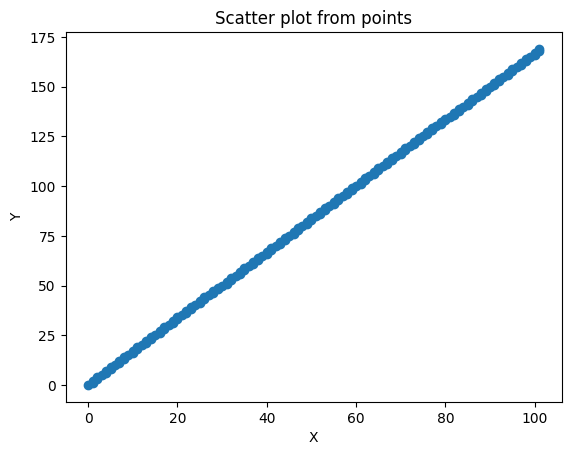

In [26]:
# Chcecking the performance of the algorithm:

# Unpacking the tuples into the separete x and y:
x_values, y_values = zip(*random_points)

# Creating scatterplot:
plt.scatter(x_values, y_values)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot from points')

# displaying:
plt.show()